In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# interactive in the notebook
#matplotlib notebook

# inlined but not interactive
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from kohonen import load_data, som_step

### Init

In [4]:
data, labels, target_digits = load_data()  # default name

Your digits:  [2 3 5 7]
Loading from binary...


In [5]:
# Kohonen algorithm hyper-parameters
size_k = 6        # size of the Kohonen map (size_k, size_k)
sigma  = 3       # width of the gaussian neighborhood
eta    = .1     # learning rate
tmax   = 2*2000  # max iteration count; substitutes convergence criterion

# initialise the centers randomly
dim = data.shape[1]     # 28*28 = 784
data_range = 255.0
centers = np.random.rand(size_k**2, dim) * data_range

# build a neighborhood matrix
neighbor = np.arange(size_k**2).reshape((size_k, size_k))

# set the random order in which the datapoints should be presented
idxs_random = np.arange(tmax) % data.shape[0]
np.random.shuffle(idxs_random)

In [6]:
def score(centers, data):
    """ Computes how well the centers fit the data """
    s = 0
    for example in data:
        s += np.min(np.sum(centers - example, axis=1)**2)  # uses broadcasting
    return s

### Training

In [7]:
scores = []
pastcenters = []

score_step = 50
center_step = 500

for step, idx in enumerate(idxs_random):
    movement, winner = som_step(centers, data[idx,:],neighbor,eta,1000/(step+1))#1000/(step+1) is our dynamic sigma
    if step %  score_step == 0:
        scores.append(score(centers, data))
    if step % center_step == 0:
        print(step/tmax*100)
        pastcenters.append(np.copy(centers))

0.0
25.0
50.0
75.0


### Display

<IPython.core.display.Javascript object>


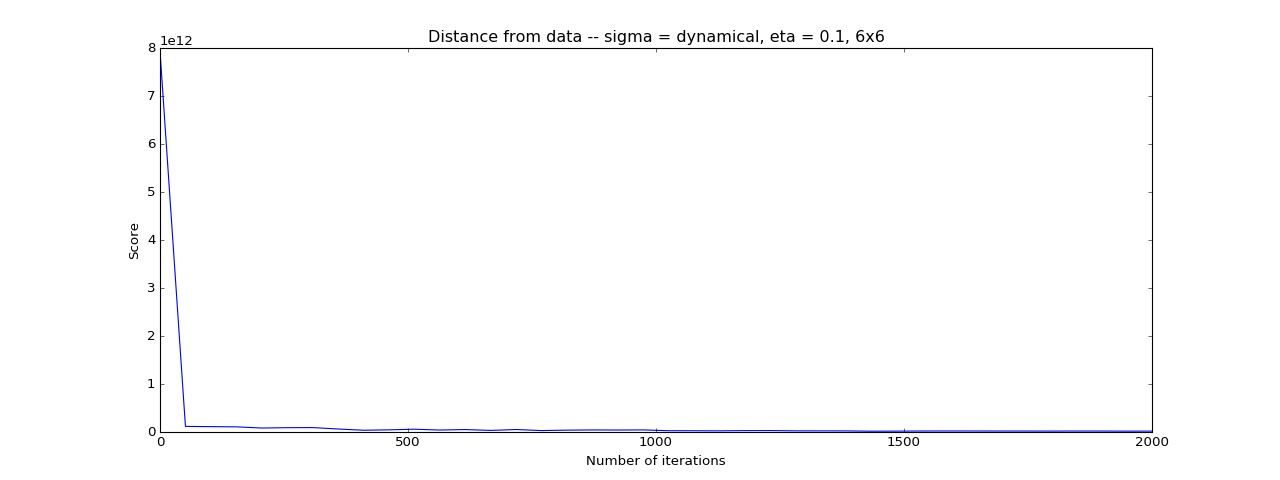

In [8]:
plt.figure(figsize=(16,6))
moving_number = 1
moving_score = np.convolve(np.array(scores)/moving_number,[1]*moving_number)
plt.plot(np.linspace(0,tmax,len(moving_score)),moving_score)
plt.xlabel('Number of iterations')
plt.ylabel('Score')
plt.title('Distance from data -- sigma = dynamical, eta = 0.1, 6x6')
# plt.show()

<IPython.core.display.Javascript object>


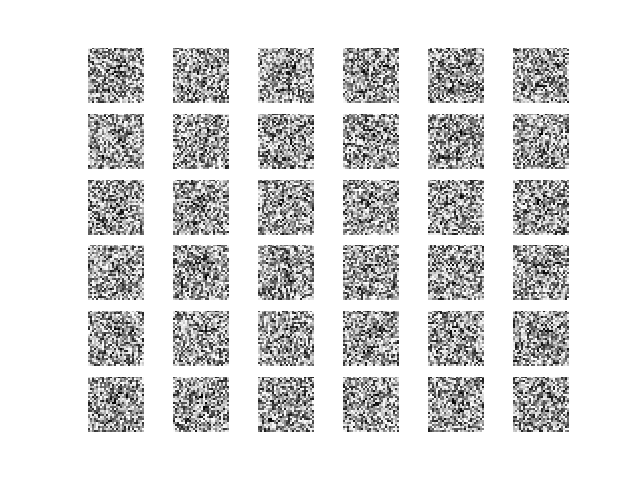

1000.0


<IPython.core.display.Javascript object>


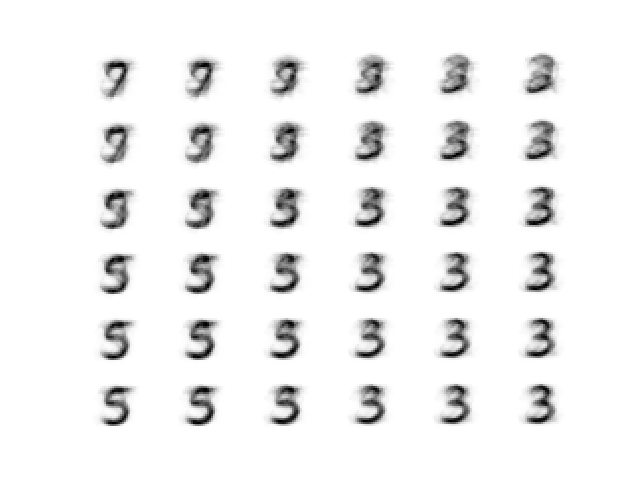

1.996007984031936


<IPython.core.display.Javascript object>


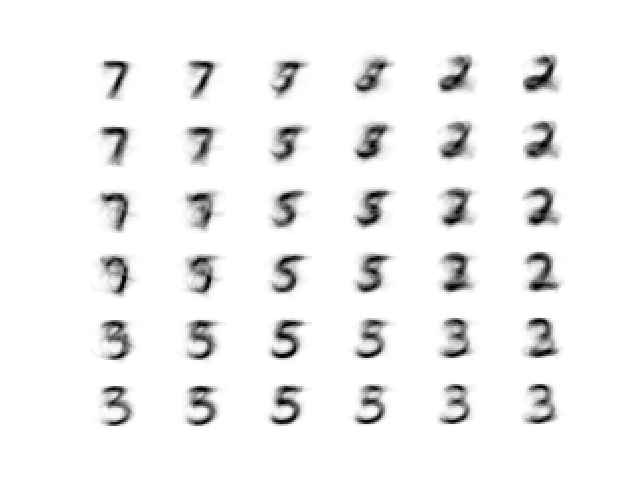

0.999000999000999


<IPython.core.display.Javascript object>


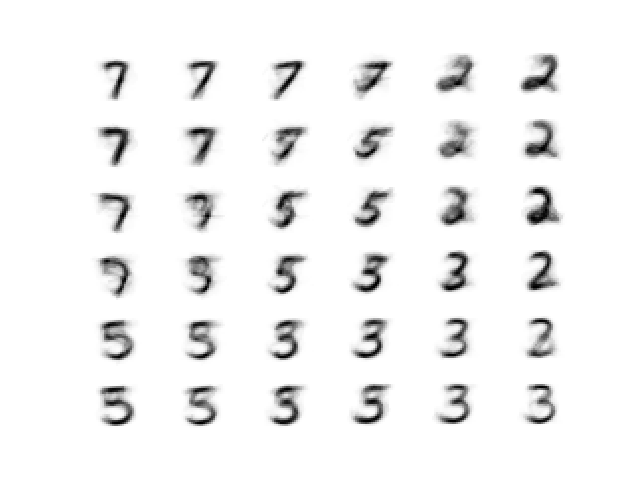

0.6662225183211192


In [9]:
# show centers
for s,pastcenter in enumerate(pastcenters):
    plt.figure()
    print(1000/(s*center_step+1))
    for j in range(size_k ** 2):        
        plt.subplot(size_k, size_k, j + 1)
        plt.imshow(np.reshape(pastcenter[j, :], [28, 28]), interpolation='nearest', cmap='Greys')
        plt.axis('off')
# plt.show()

In [10]:
def predictNeurons(centers, data, labels, target_digits):
    accumul = np.zeros((len(centers),4))
    accumul2 = np.zeros((len(centers),4))
    for i in range(2000):
        winner = np.argmin(np.sum((centers - data[i])**2, axis=1))
        accumul[winner,target_digits==labels[i]] += 1
    for j in range(len(centers)):
        accumul2[j] = target_digits[np.argmax(accumul[j])]
    return accumul2[:,0],accumul

In [11]:
predicted_digits,digits_accumulator = predictNeurons(centers, data, labels, target_digits)
predicted_digits

array([ 7.,  7.,  7.,  7.,  2.,  2.,  7.,  7.,  7.,  5.,  2.,  2.,  7.,
        7.,  5.,  5.,  2.,  2.,  7.,  5.,  5.,  5.,  2.,  2.,  5.,  5.,
        3.,  3.,  3.,  2.,  3.,  3.,  3.,  5.,  3.,  3.])

<IPython.core.display.Javascript object>


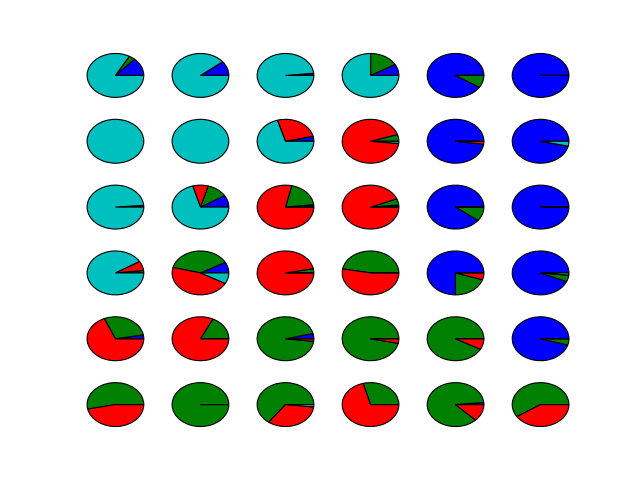

In [12]:
plt.figure()
for j in range(size_k ** 2):        
    plt.subplot(size_k, size_k, j + 1)
    plt.pie(digits_accumulator[j])
    plt.axis('off')